<a href="https://colab.research.google.com/github/Rupeshgarsondiya/Deep-Learning/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Name     : Rupesh Garsondiya
github   : @Rupeshgarsondiya
Topic    : Gradient descent in Neural Network Deep-learning(DL)
Refrance : Campus X Deep-Learning
'''

'\nName   : Rupesh Garsondiya\ngithub : @Rupeshgarsondiya\nTopic  : Gradient descent in Neural Network Deep-learning(DL)\n'

In [ ]:
# import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_circles

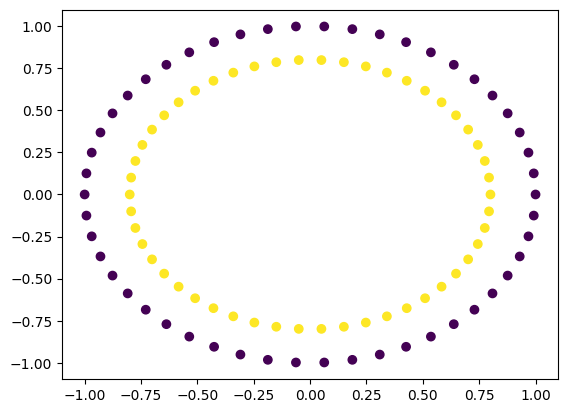

(100, 2)
(100,)


In [ ]:
# load the data
X, y = make_circles(n_samples=100, random_state=42)

# plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

print(X.shape)
print(y.shape)

# Gradient descent
 - It is an optimazation algoritham
 - In this algoritham we calculate the gradient
 - calculate partial derivate of loss function with respect to    weight and bais

# Types of Gradient descent
 - Batch Gradient descent
 - Mini Batch Gradient descent
 - Sochastic Gradient descent

#Batch Gradient Descent

**Pseudo code:**

     for i in range(epochs):
         1. Calculate predictions for the entire dataset.  
         2. Calculate the loss.  
         3. Update weights and biases.  

- In batch gradient descent, the total number of weight updates is equal to the number of epochs.
- This is also referred to as Vanilla Gradient Descent.
- It is faster compared to the other two gradient descent algorithms.
- In this approach, we use the entire dataset at once for each update.
- Batch Gradient Descent (BGD) does not work well with functions that have both local and global minima. If BGD reaches a local minimum, it may never escape to find the global minimum. This problem is overcome by Stochastic Gradient Descent (SGD).

In [ ]:
# Example
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
start = time.time()
GD_history = model.fit(X, y, epochs=100,batch_size=X.shape[0],validation_split= 0.2)
# Batch size hyper parameter is for diffrent type gradient descent algotitham
# if batch size = no of row , it work as batch gradient descent
t_time = time.time()-start
print('Total training time : ',t_time)

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5250 - loss: 0.7341 - val_accuracy: 0.4000 - val_loss: 0.7716
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step - accuracy: 0.5250 - loss: 0.7338 - val_accuracy: 0.4000 - val_loss: 0.7711
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5250 - loss: 0.7335 - val_accuracy: 0.4000 - val_loss: 0.7706
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5250 - loss: 0.7332 - val_accuracy: 0.4000 - val_loss: 0.7701
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5250 - loss: 0.7329 - val_accuracy: 0.4000 - val_loss: 0.7696
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5250 - loss: 0.7326 - val_accuracy: 0.4000 - val_loss: 0.7690
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.5250 - loss: 0.7322 - val_accuracy: 0.4000 - val_loss: 0.7685
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.5250 - loss: 0.7319 - val_accuracy: 0.4000 - val_lo

# Batch Gradient Descent

**Pesudo code : **

       for i in epochs:

           for j in X.shape[0]:

                 1. Shuffle the data.
                 2. Select a row randomly.
                 3. Calculate the output for the selected row.
                 4. Calculate the loss.
                 5. Update the weights and biases .
      
  - SGD converges faster than the other two gradient descent algorithms.
  - The loss graph of SGD is spiky, and this characteristic helps in situations where both local and global minima are present.
  - SGD is slower in terms of training time.

In [ ]:
# Example stochastic gradient descent
model1 = Sequential()
model1.add(Dense(2, activation='sigmoid', input_shape=(2,)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()
start1 = time.time()
SGD_history = model1.fit(X, y, epochs=100,batch_size=1,validation_split=0.2)
t_time1 = time.time()-start1
print('Total training time : ',t_time1) # This funtion time give in second

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4719 - loss: 0.6981 - val_accuracy: 0.6000 - val_loss: 0.6898
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3911 - loss: 0.6997 - val_accuracy: 0.6000 - val_loss: 0.6911
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4362 - loss: 0.6951 - val_accuracy: 0.6000 - val_loss: 0.6930
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5190 - loss: 0.6892 - val_accuracy: 0.6000 - val_loss: 0.6934
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5083 - loss: 0.6950 - val_accuracy: 0.4500 - val_loss: 0.6951
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5425 - loss: 0.6924 - val_accuracy: 0.4000 - val_loss: 0.6958
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6891 - val_accuracy: 0.3500 - val_loss: 0.6972
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5883 - loss: 0.6902 - val_accuracy: 0.4000 - v

# Loss graph GD vs SGD

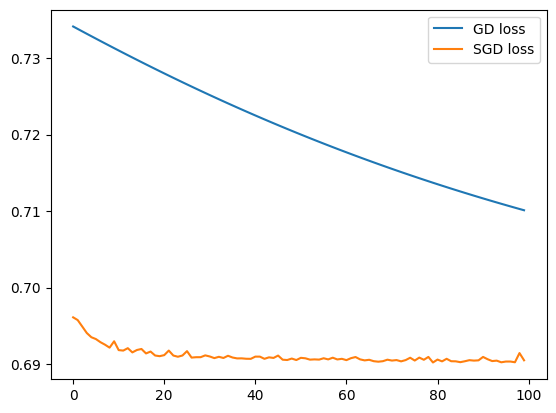

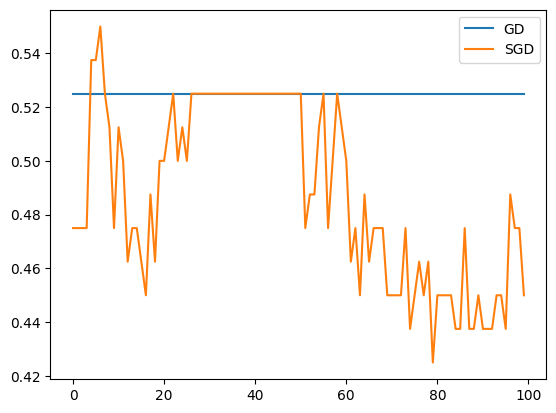

In [ ]:
plt.plot(GD_history.history['loss'], label='GD')
plt.plot(SGD_history.history['loss'], label='SGD')
plt.legend( ['GD loss','SGD loss'])
plt.show()

plt.plot(GD_history.history['accuracy'], label='GD')
plt.plot(SGD_history.history['accuracy'], label='SGD')
plt.legend()
plt.show()

In [ ]:
# here we clearly so spiky nature in loss and  accuracy both graph


# Mini Batch Gradient Descent

**Pesudo code : **
        
         for i in range(epochs):
              
              for i in range(no of batch):
                   
                   1. calculate prediction for batch(vectorization)
                   2. calculate loss
                   3. update weight and baises


- We need to specify the batch size.
- The total number of batches = n/batch_sizen/batch_size (where nn is the total number of rows in the dataset).
- This algorithm is a mix of Gradient Descent (GD) and Stochastic Gradient Descent (SGD).
- The batch size is typically a power of 2, as it is an efficient way to utilize memory (RAM). (This was asked in an interview with a CampusX student.)
- It has a less spiky nature compared to SGD.

In [ ]:
# example of mini batch gradient descent

model2 = Sequential()
model2.add(Dense(2, activation='sigmoid', input_shape=(2,)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()
start2 = time.time()
MBGD_history = model2.fit(X, y, epochs=10,batch_size=10,validation_split=0.2)
t_time2 = time.time()-start2
print('Total training time : ',t_time2)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6103 - loss: 0.6790 - val_accuracy: 0.4000 - val_loss: 0.7208
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5157 - loss: 0.6974 - val_accuracy: 0.4000 - val_loss: 0.7197
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5421 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.7190
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5315 - loss: 0.6968 - val_accuracy: 0.4000 - val_loss: 0.7184
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5784 - loss: 0.6829 - val_accuracy: 0.4000 - val_loss: 0.7181
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5853 - loss: 0.6815 - val_accuracy: 0.4000 - val_loss: 0.7176
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5249 - loss: 0.6939 - val_accuracy: 0.4000 - val_loss: 0.7168
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5799 - loss: 0.6844 - val_accuracy: 0.4000 - val_loss: 0.7164
Epoch 9

# Loss graph Mini Batch GD and Stochastic GD

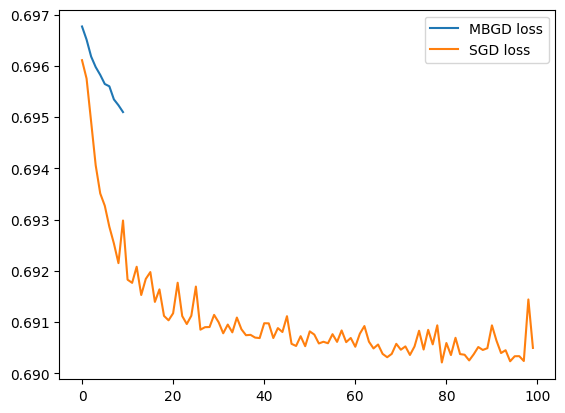

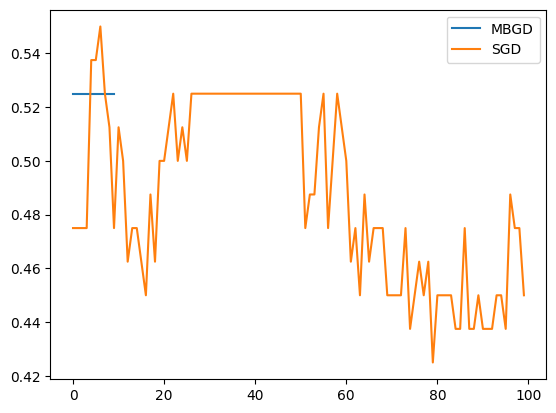

In [ ]:
plt.plot(MBGD_history.history['loss'], label='MBGD')
plt.plot(SGD_history.history['loss'], label='SGD')
plt.legend( ['MBGD loss','SGD loss'])
plt.show()

plt.plot(MBGD_history.history['accuracy'], label='MBGD')
plt.plot(SGD_history.history['accuracy'], label='SGD')
plt.legend()
plt.show()